Accuracy: 0.7257290746117915
ROC AUC: 0.7322251266322962


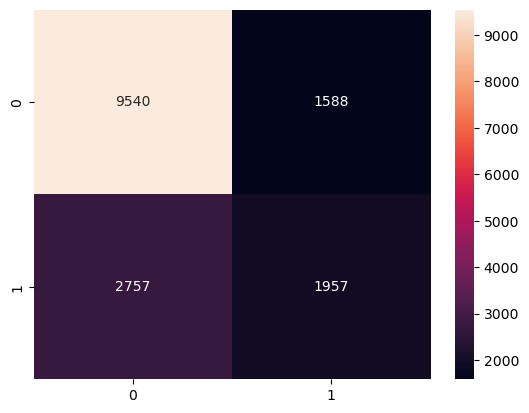

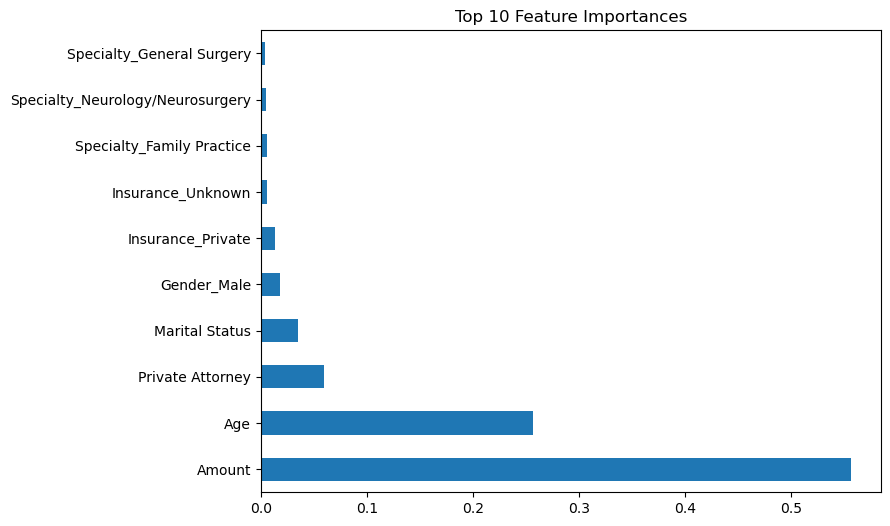

In [8]:
# Step 0: Import Libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset
df = pd.read_csv("medicalmalpractice.csv")
df.head()

# Step 2: Define Target Variable
df['high_severity'] = df['Severity'].apply(lambda x: 1 if x >= 6 else 0)
df['high_severity'].value_counts()

# Step 3: Encode Categorical Features
cat_cols = ['Specialty', 'Insurance', 'Gender']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df[cat_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))

# Combine numerical columns
num_cols = ['Amount', 'Age', 'Private Attorney', 'Marital Status']
df_model = pd.concat([df[num_cols], encoded_df, df['high_severity']], axis=1)

# Step 4: Split Dataset
X = df_model.drop('high_severity', axis=1)
y = df_model['high_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions & Evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

# Step 8: Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()
